In [57]:
from Autodiff.AutoDiff import DiffObj, Variable, Constant
from Autodiff.AutoDiff import MathOps as mo

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Newton Raphson Demo
We find one of the roots of the following function using our AutoDiff package:
$$
f(x) = 5^{\left(1 + sin\left(log\left(5 + x^2\right)\right)\right)} - 10
$$

In [106]:
x = Variable('x')
c1 = Constant('c1', 1)
c2 = Constant('c2', 2)
c3 = Constant('c3', 5)
c4 = Constant('c4', 10)
f = c3**(c1 + mo.sin(mo.log(c3 + x**c2))) - c4
tolerance = 0.001
guess = 20
max_iter = 10000
val_dict = {'x' : guess}
evals = []
fx = f.get_val(val_dict)
for i in range(max_iter):
    evals += [fx]
    dx = f.get_der(val_dict)['x']
    val_dict['x'] = val_dict['x'] - fx/dx
    new_fx = f.get_val(val_dict)
    if abs(new_fx - fx) < tolerance: fx = new_fx; break
    fx = new_fx

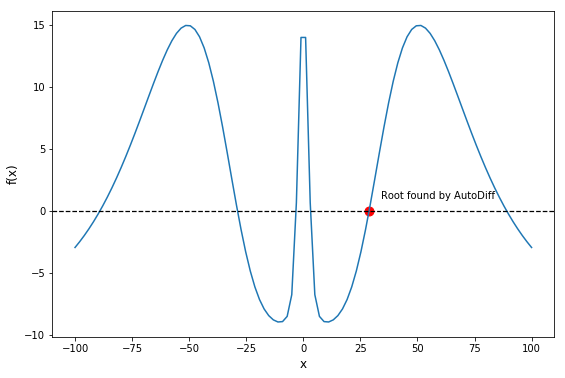

In [107]:
x_vals = np.linspace(-100,100,100)
y_vals = 5**(1+ np.sin(np.log(5 + x_vals**2))) - 10
fig = plt.gcf()
fig.set_size_inches(9,6)
_ = plt.plot(x_vals, y_vals)
_ = plt.axhline(0, color='k', ls='--', lw=1.25)
_ = plt.ylabel('f(x)', fontsize=12)
_ = plt.xlabel('x', fontsize=12)
_ = plt.scatter([val_dict['x']], [fx], color='r', marker='o', s=80)
_ = plt.annotate('Root found by AutoDiff', (val_dict['x']+5, fx+1))

## Elementary Math Operators (add, subtract, mult, divide) 

In [2]:
val_dict = {'x' : 10, 'y' : 20, 'z' : 1}
x = Variable('x')
y = Variable('y')

In [3]:
f0 = x + y
print('Value:    ', f0.get_val(val_dict))
print('Gradient: ', f0.get_der(val_dict))

Value:     30
Gradient:  {'x': 1, 'y': 1}


In [4]:
f1 = x - y
print('Value:    ', f1.get_val(val_dict))
print('Gradient: ', f1.get_der(val_dict))

Value:     -10
Gradient:  {'x': 1, 'y': -1}


In [5]:
f2 = x*y
print('Value:    ', f2.get_val(val_dict))
print('Gradient: ', f2.get_der(val_dict))

Value:     200
Gradient:  {'x': 20, 'y': 10}


In [6]:
f3 = x/y
print('Value:    ', f3.get_val(val_dict))
print('Gradient: ', f3.get_der(val_dict))

Value:     0.5
Gradient:  {'x': 0.05, 'y': -0.025}


In [7]:
f4 = f1 + f2 + f3
print('Value:    ', f4.get_val(val_dict))
print('Gradient: ', f4.get_der(val_dict))

Value:     190.5
Gradient:  {'x': 21.05, 'y': 8.975}


In [8]:
f5 = f4*f1
print('Value:    ', f5.get_val(val_dict))
print('Gradient: ', f5.get_der(val_dict))

Value:     -1905.0
Gradient:  {'x': -20.0, 'y': -280.25}


In [9]:
z = Variable('z')
z.get_der(val_dict, ['x', 'y', 'z'])

{'x': 0, 'y': 0, 'z': 1}

In [10]:
c = Constant('c', 5)
print('Value:    ', c.get_val(val_dict))
print('Gradient: ', c.get_der(val_dict,  ['x', 'y']))

Value:     5
Gradient:  {'x': 0, 'y': 0}


In [11]:
f6 = x + y + c
print('Value:    ', f6.get_val(val_dict))
print('Gradient: ', f6.get_der(val_dict))

Value:     35
Gradient:  {'x': 1, 'y': 1}


In [12]:
f7 = c*x*y
print('Value:    ', f7.get_val(val_dict))
print('Gradient: ', f7.get_der(val_dict))

Value:     1000
Gradient:  {'x': 100, 'y': 50}


## Other Math Operators (sin, cos, tan, log)

In [13]:
import math
c1 = Constant('c1', math.pi/2)
val_dict1 = {'x' : math.pi/2, 'y' : math.pi/4, 'z' : 2}
f8 = mo.sin(c1)
print('Value:    ', f8.get_val(val_dict1))
print('Gradient: ', f8.get_der(val_dict1))

Value:     1.0
Gradient:  {'': 0}


In [14]:
f9 = mo.sin(x + y)
print('Value:    ', f9.get_val(val_dict1))
print('Gradient: ', f9.get_der(val_dict1))

Value:     0.7071067811865476
Gradient:  {'x': -0.7071067811865475, 'y': -0.7071067811865475}


In [15]:
f10 = x + mo.sin(x*z + y)
print('Value:    ', f10.get_val(val_dict1))
print('Gradient: ', f10.get_der(val_dict1))

Value:     0.8636895456083491
Gradient:  {'x': -0.41421356237309537, 'z': -1.1107207345395917, 'y': -0.7071067811865477}


In [16]:
f11 = x*y + mo.log(x*y*z)
print('Value:    ', f11.get_val(val_dict1))
print('Gradient: ', f11.get_der(val_dict1))

Value:     2.1368659607150793
Gradient:  {'x': 1.4220179357650298, 'y': 2.8440358715300595, 'z': 0.5}


## Exponentiation

In [17]:
val_dict2 = {'x': 3, 'y': math.pi/3, 'z' : 10}
c2 = Constant('c2', 4)
f12 = x**c2
print('Value:    ', f12.get_val(val_dict2))
print('Gradient: ', f12.get_der(val_dict2))

Value:     81
Gradient:  {'x': 108.0}


In [18]:
f13 = x**mo.sin(y)
print('Value:    ', f13.get_val(val_dict2))
print('Gradient: ', f13.get_der(val_dict2))

Value:     2.589399902260344
Gradient:  {'x': 0.7474953653048001, 'y': 1.4223732764496084}


In [19]:
f14 = x**(mo.sin(y) + mo.log(x*z))
print('Value:    ', f14.get_val(val_dict2))
print('Gradient: ', f14.get_der(val_dict2))

Value:     108.63823209022168
Gradient:  {'x': 194.31161204650834, 'y': 59.675648396747874, 'z': 11.935129679349574}


In [20]:
f15 = mo.cos(mo.sin(mo.log(x**c2 + c2) + y**c2 + z**c2))
print('Value:    ', f14.get_val(val_dict2))
print('Gradient: ', f14.get_der(val_dict2))

Value:     108.63823209022168
Gradient:  {'x': 194.31161204650834, 'y': 59.675648396747874, 'z': 11.935129679349574}


In [21]:
c3 = Constant('c3', 0)
f16 = x**c3
print('Value:    ', f16.get_val(val_dict2))
print('Gradient: ', f16.get_der(val_dict2))

Value:     1
Gradient:  {'x': 0.0}


In [34]:
val_dict4 = {'x' : -2, 'y' : 0}
f17 = x**y
print('Value:    ', f17.get_val(val_dict4))
print('Gradient: ', f17.get_der(val_dict4))

Value:     1


ValueError: Derivative is only defined for positive Base in an Exponentiation.

In [35]:
val_dict4 = {'x' : 2, 'y' : -0.5}
f17 = x**y
print('Value:    ', f17.get_val(val_dict4))
print('Gradient: ', f17.get_der(val_dict4))

Value:     0.7071067811865476
Gradient:  {'x': -0.1767766952966369, 'y': 0.4901290717342736}
